# Asari table preprocessing

In [3]:
# !pip install seaborn

  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Using cached matplotlib-3.7.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached fonttools-4.38.0-py3-none-any.whl (965 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
  Using cached Pillow-9.4.0-cp310-cp310-manylinux_2_28_x86_64.whl (3.4 MB)
  Using cached contourpy-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [1]:
import pandas as pd
import os
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from random import randrange

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
asari_out_fdr = "../../../asari-output-RPneg/output_asari_project_31312361/"
targeted_file = "../../../target_list/PS-target-list-singular-M-H.txt"
metadata_file = "../../../seq/RPneg_addgrp.csv"
mode = "RPneg"
group_percNA_threshold = 0.3 # < percNA, should be presented in any group

In [4]:
output_dir = "../../output/preprocessing_on_targeted_extract" + str(randrange(0,100))

In [5]:
try:
    os.mkdir(output_dir)
except:
    print("not done")

In [6]:
target_feat_df = pd.read_csv(os.path.join(asari_out_fdr,'targeted_extraction__Feature_table.tsv'),sep = '\t')

In [7]:
target_feat_df.head()

,query_target,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,MT_20230308_032,Blank_20230308_002,Blank_20230308_004,Blank_20230308_006,Blank_std_20230308_1_002,MT_20230308_002,MT_20230308_004,MT_20230308_006,MT_20230308_008,MT_20230308_010,MT_20230308_012,MT_20230308_014,MT_20230308_016,MT_20230308_018,MT_20230308_020,MT_20230308_022,MT_20230308_024,MT_20230308_026,MT_20230308_028,MT_20230308_030
0,482.288282,F1614,482.2890,207.04,204.92,209.41,1335,4365548,0.88,0.85,430,16,0,0,20555,48411,60662,0,0,321382,235911,655433,151268,66061,548649,448802,198916,441632,844487,167207,43418,395143
1,498.283197,F3712,498.2843,33.72,32.23,36.32,1567,18072147,1.00,0.94,270,15,0,837591,717296,646253,0,0,491014,1532934,1230597,910433,702748,621143,2266499,942310,1587450,1069759,1205834,0,0,1426358
2,524.298847,F1779,524.2982,96.47,93.85,99.13,1928,36918657,0.76,0.97,470,14,0,0,0,0,1698237,0,0,2803625,3026357,2958153,2827464,2817111,2754368,2156389,2912621,2697065,2971851,3236482,2724970,3001170
3,538.350882,F3031,538.3514,107.59,104.85,110.34,2126,30389790,0.92,0.98,119,3,9740323,0,0,0,0,10627114,10399747,0,0,0,0,0,0,0,0,0,0,0,0,0
4,540.330147,F3138,540.3305,70.18,67.44,72.92,2147,29371349,0.95,0.98,23,7,6883593,0,0,0,0,6872501,6813756,0,0,0,2352009,2308541,0,0,0,0,0,2322796,2729822,0


In [8]:
print(f'number of features are: {target_feat_df.shape[0]}')

number of features are: 108


In [9]:
meta_df = pd.read_csv(metadata_file, header = 0)

In [10]:
meta_df.head()

,Sample Type,File Name,Sample ID,Sample_ID_upd,Comment,Path,Instrument Method,Process Method,Position,Inj Vol
0,Blank,Blank_20230308_002,Blank_20230308_002,Blank_1,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
1,Blank,Blank_20230308_004,Blank_20230308_004,Blank_2,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A1,2
2,Blank,Blank_std_20230308_1_002,Blank_std_20230308_002,Blank_std_1,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A2,2
3,QC,MT_20230308_002,Qstd_20230308_002,Qstd_1,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2
4,QC,MT_20230308_004,Qstd_20230308_004,Qstd_2,1,D:\IDX_Data\Maheshwor\20220213_phosphatidylser...,C:\Xcalibur\methods\MT\phosphatidylserine_tSIM...,NaN,G:A3,2


In [11]:
name_dict = {row['File Name']:row['Sample_ID_upd'] for i, row in meta_df.iterrows() }

In [12]:
target_feat_df.columns = [name_dict[x] if x in name_dict else x for x in target_feat_df.columns]

In [13]:
target_feat_df.head()

,query_target,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Qstd_3,Blank_1,Blank_2,Blank_3,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,Tn_750K_3,Tn_750K_4,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3
0,482.288282,F1614,482.2890,207.04,204.92,209.41,1335,4365548,0.88,0.85,430,16,0,0,20555,48411,60662,0,0,321382,235911,655433,151268,66061,548649,448802,198916,441632,844487,167207,43418,395143
1,498.283197,F3712,498.2843,33.72,32.23,36.32,1567,18072147,1.00,0.94,270,15,0,837591,717296,646253,0,0,491014,1532934,1230597,910433,702748,621143,2266499,942310,1587450,1069759,1205834,0,0,1426358
2,524.298847,F1779,524.2982,96.47,93.85,99.13,1928,36918657,0.76,0.97,470,14,0,0,0,0,1698237,0,0,2803625,3026357,2958153,2827464,2817111,2754368,2156389,2912621,2697065,2971851,3236482,2724970,3001170
3,538.350882,F3031,538.3514,107.59,104.85,110.34,2126,30389790,0.92,0.98,119,3,9740323,0,0,0,0,10627114,10399747,0,0,0,0,0,0,0,0,0,0,0,0,0
4,540.330147,F3138,540.3305,70.18,67.44,72.92,2147,29371349,0.95,0.98,23,7,6883593,0,0,0,0,6872501,6813756,0,0,0,2352009,2308541,0,0,0,0,0,2322796,2729822,0


In [14]:
end_index = 12

In [15]:
target_feat_df.iloc[:,end_index-2:end_index +2].columns

Index(['snr', 'detection_counts', 'Qstd_3', 'Blank_1'], dtype='object')

In [16]:
new_col = target_feat_df.columns[0:end_index].tolist() + meta_df['Sample_ID_upd'].tolist()

In [17]:
reord_target_feat_df = target_feat_df[new_col]

#### export the renamed target feature table without any normalizations...

In [18]:
reord_target_feat_df.to_csv(os.path.join(output_dir,"renamed_targeted_extraction__Feature_table.csv"),index = False)

------

------

#### Since this is a small experiment
- I have modified the metadata accordingly, no need for doing this in the later sections`m

In [19]:
def extract_list2list(regExpr,a_list):
    return([re.search(regExpr,x)[0] for x in a_list if re.search(regExpr,x)])

def extract_list2dict(regExpr,a_list):
    return({x:re.search(regExpr,x)[0] for x in a_list if re.search(regExpr,x)})

---------

## Preprocess the asari table 
- Separate metainfo_df & data_df; convert zero to np.nan

In [20]:
reord_target_feat_df.index = reord_target_feat_df['id_number']

In [21]:
end_index = 12

In [22]:
reord_target_feat_df.columns[end_index-2:end_index+2]

Index(['snr', 'detection_counts', 'Blank_1', 'Blank_2'], dtype='object')

In [23]:
data_df = reord_target_feat_df.iloc[:,end_index:]

In [24]:
data_df.head()

,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,Tn_750K_3,Tn_750K_4,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3
id_number,,,,,,,,,,,,,,,,,,,,
F1614,0,20555,60662,0,0,321382,235911,655433,151268,66061,548649,448802,198916,441632,844487,167207,43418,395143,0,48411
F3712,837591,717296,0,0,491014,1532934,1230597,910433,702748,621143,2266499,942310,1587450,1069759,1205834,0,0,1426358,0,646253
F1779,0,0,1698237,0,0,2803625,3026357,2958153,2827464,2817111,2754368,2156389,2912621,2697065,2971851,3236482,2724970,3001170,0,0
F3031,0,0,0,10627114,10399747,0,0,0,0,0,0,0,0,0,0,0,0,0,9740323,0
F3138,0,0,0,6872501,6813756,0,0,0,2352009,2308541,0,0,0,0,0,2322796,2729822,0,6883593,0


In [25]:
metainfo_df = reord_target_feat_df.iloc[:,0:end_index]

In [26]:
# turn all zero to NA for easy manipulation later
data_df[data_df == 0 ] = np.nan

---

-----

## Sample present reporting

### functions

In [27]:
def select_column_regExpr(feat_df,regPattern):
    res_df = feat_df.loc[:,[x for x in feat_df.columns \
                            if re.search(regPattern,x)]]
    return(res_df)

def report_basic_stat(df):
    '''
    Default calculate mean and percentage of NA for any table.
    Before inputting the table, filtering steps may need to be done like correlation of blank matrix and filter out samples.
    '''
    if any(df == 0):
        df[df == 0] = np.nan
    mean_list = df.apply(lambda x: x.mean(skipna = True), axis=1)
    percNA_list = df.apply(lambda x: x.isna()).sum(axis = 1)/df.shape[1]
    df_stat_tab = pd.DataFrame({
                           'percNA':percNA_list, 
                           'mean': mean_list})
    df_dict = df_stat_tab.to_dict('index')
    return(df_dict)

def select_and_report(feat_df,regPattern):
    sel_df = select_column_regExpr(feat_df,regPattern)
    rep_dict = report_basic_stat(sel_df)
    return(rep_dict)

### perform sample present report

In [28]:
Tn_dict = select_and_report(data_df,'Tn')
CD8stem_dict = select_and_report(data_df,'CD8stem')
CD8trans_dict = select_and_report(data_df,'CD8trans')
CD8TD_dict = select_and_report(data_df,'CD8TD')

In [29]:
dict_of_dict = {'Tn': Tn_dict,
                'CD8stem': CD8stem_dict,
                'CD8trans': CD8trans_dict,
                'CD8TD': CD8TD_dict      
}

In [30]:
def dicts2table(dict_of_dict):
    new_df = pd.DataFrame()
    for k,v in dict_of_dict.items():
        tab = pd.DataFrame(v).transpose()
        tab.columns = [k + "_" + x for x in tab.columns]
        new_df =  pd.concat([new_df, tab], axis=1)
    return(new_df)

In [31]:
stat_tab = dicts2table(dict_of_dict)

In [32]:
stat_tab.head()

,Tn_percNA,Tn_mean,CD8stem_percNA,CD8stem_mean,CD8trans_percNA,CD8trans_mean,CD8TD_percNA,CD8TD_mean
F1614,0.0,277168.25,0.0,498725.5,0.0,643059.5,0.0,105312.5
F3712,0.0,866230.25,0.0,1604404.5,0.0,1137796.5,1.0,NaN
F1779,0.0,2907271.25,0.0,2455378.5,0.0,2834458.0,0.0,2980726.0
F3031,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN
F3138,0.5,2330275.00,1.0,NaN,1.0,NaN,0.0,2526309.0


------

## add stat into feature table and rearrange sample order

In [33]:
metainfo_df.columns

Index(['query_target', 'id_number', 'mz', 'rtime', 'rtime_left_base', 'rtime_right_base', 'parent_masstrack_id', 'peak_area', 'cSelectivity', 'goodness_fitting', 'snr', 'detection_counts'], dtype='object')

In [34]:
data_df.columns

Index(['Blank_1', 'Blank_2', 'Blank_std_1', 'Qstd_1', 'Qstd_2', 'pooled_1', 'Tn_250K_1', 'Tn_250K_2', 'Tn_750K_3', 'Tn_750K_4', 'CD8stem_250K_1', 'CD8stem_300K_2', 'pooled_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2', 'pooled_3', 'Qstd_3', 'Blank_3'], dtype='object')

In [35]:
def group_filtering(feat_df = data_df,
                    stat_df = stat_tab,
                    group_percNA_threshold = group_percNA_threshold,
                    group_signature = ['R5pos','R5neg','Naive'], # the group you would like to do filtering
                    percNA_suffix_inRegExpr = '\\_percNA'):
    '''
    Perform group filtering
    
    '''
    group_percNA_df = select_column_regExpr(stat_df,('|').join([x + percNA_suffix_inRegExpr \
                                                                            for x in group_signature]))
    group_percNA_df_filtered = group_percNA_df.loc[group_percNA_df.apply(lambda x: x < group_percNA_threshold,
                                                                         axis =1).any(axis = 1),
                                                   :]
    new_stat_df = stat_df.loc[group_percNA_df_filtered.index,:]
    new_feat_df = feat_df.loc[group_percNA_df_filtered.index,:]
    
    return(new_feat_df,new_stat_df)

In [36]:
grp_filt_df, grp_filt_stat_df = group_filtering(feat_df = data_df,
                                                stat_df = stat_tab,
                                                group_percNA_threshold = group_percNA_threshold,
                                                group_signature = ['Tn','CD8stem','CD8trans','CD8TD'],
                                                percNA_suffix_inRegExpr = '\\_percNA')

In [37]:
grp_filt_stat_df.shape

(42, 8)

In [38]:
print(f"Before filtering, there are {reord_target_feat_df.shape[0]} number of features\n \
finally after group filtering, there are {grp_filt_df.shape[0]} number of features")

Before filtering, there are 108 number of features
 finally after group filtering, there are 42 number of features


In [39]:
def combine_tables(list_df = [metainfo_df,grp_filt_stat_df,grp_filt_df],
                key_index_df = stat_tab):
    index = key_index_df.index
    new_list_df = []
    for df in list_df:
        new_list_df.append(df.loc[index,:])
    merge_df = pd.concat(new_list_df,axis =1)
    return(merge_df)

In [40]:
m_df = combine_tables(list_df = [metainfo_df,grp_filt_stat_df,grp_filt_df],  # the order of df directly afffects the order of the columns
                    key_index_df = grp_filt_stat_df)

In [41]:
m_df.to_csv(
    os.path.join(output_dir,
                   f"groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False)

grp_filt_stat_df.to_csv(
    os.path.join(output_dir,
                   f"groupFil{group_percNA_threshold}_{mode}_stattab.csv"))

---

---

---

## Filtering samples based on QC report (if needed)

In [42]:
# No outliers identified in this analysis, thus the outliers list is empty
outliers = []

In [43]:
def dropSamples(feat_df,dropSampleList):
    fil_feat_df = feat_df.drop(dropSampleList, axis = 1)
    return(fil_feat_df)

In [44]:
if outliers:
    outDrop_grp_filt_df = dropSamples(grp_filt_df, outliers)
    outDrop_grp_filt_df.to_csv(
        os.path.join(output_dir,
                       f"outDrop_blankM_groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False)
else:
    outDrop_grp_filt_df = m_df

## TIC normalization for top 1000 features

In [45]:
grp_filt_df.head()

,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,Tn_750K_3,Tn_750K_4,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3
F1614,NaN,20555.0,60662.0,NaN,NaN,321382.0,235911.0,655433.0,151268.0,66061.0,548649.0,448802.0,198916.0,441632.0,844487.0,167207.0,43418.0,395143.0,NaN,48411.0
F3712,837591.0,717296.0,NaN,NaN,491014.0,1532934.0,1230597.0,910433.0,702748.0,621143.0,2266499.0,942310.0,1587450.0,1069759.0,1205834.0,NaN,NaN,1426358.0,NaN,646253.0
F1779,NaN,NaN,1698237.0,NaN,NaN,2803625.0,3026357.0,2958153.0,2827464.0,2817111.0,2754368.0,2156389.0,2912621.0,2697065.0,2971851.0,3236482.0,2724970.0,3001170.0,NaN,NaN
F3138,NaN,NaN,NaN,6872501.0,6813756.0,NaN,NaN,NaN,2352009.0,2308541.0,NaN,NaN,NaN,NaN,NaN,2322796.0,2729822.0,NaN,6883593.0,NaN
F5983,1059689.0,NaN,NaN,NaN,NaN,2395823.0,2393499.0,1716285.0,1290411.0,1450712.0,3675461.0,1596170.0,2193715.0,1389912.0,2101354.0,NaN,1530704.0,2716537.0,NaN,793991.0


In [46]:
samples_df = select_column_regExpr(outDrop_grp_filt_df,'Tn\\_[0-9]+|CD8stem\\_[0-9]+|CD8trans\\_[0-9]+|CD8TD\\_[0-9]')

In [47]:
samples_df.head()

,Tn_250K_1,Tn_250K_2,Tn_750K_3,Tn_750K_4,CD8stem_250K_1,CD8stem_300K_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2
F1614,235911.0,655433.0,151268.0,66061.0,548649.0,448802.0,441632.0,844487.0,167207.0,43418.0
F3712,1230597.0,910433.0,702748.0,621143.0,2266499.0,942310.0,1069759.0,1205834.0,NaN,NaN
F1779,3026357.0,2958153.0,2827464.0,2817111.0,2754368.0,2156389.0,2697065.0,2971851.0,3236482.0,2724970.0
F3138,NaN,NaN,2352009.0,2308541.0,NaN,NaN,NaN,NaN,2322796.0,2729822.0
F5983,2393499.0,1716285.0,1290411.0,1450712.0,3675461.0,1596170.0,1389912.0,2101354.0,NaN,1530704.0


In [70]:
samples_df.shape

(42, 10)

In [48]:
import copy
def TIC_Normalization_TopN(data_df,
                           topN = 1000):
    if any(data_df.apply(lambda x: x == 0).any()):
        data_df[data_df == 0] = np.nan
    feature_ids = data_df.sum(axis = 1, 
                              skipna = True
                             ).sort_values(ascending = False)[0:topN].index
    meanTIC = data_df.loc[feature_ids,:].mean(axis=0,skipna = True)
    # print mean of TIC of the topN features
    print(meanTIC[0:5])
    factor_dict = dict(meanTIC/meanTIC.median())
    new_data_df = copy.deepcopy(data_df)
    for k,v in factor_dict.items():
        new_data_df[k] = [x/v for x in new_data_df[k]]
    # print meanTIC of topN features post-TIC normalization, should be the same
    print(new_data_df.loc[feature_ids,:].mean(axis=0,skipna = True)[0:5])
    
    # print meanTIC of all features post-TIC normalization, should be closed
    print(new_data_df.mean(axis=0,skipna = True)[0:5])
    
    return(new_data_df)

In [49]:
TICnorm_data_df = TIC_Normalization_TopN(samples_df,topN = 1000)

Tn_250K_1         3.782249e+06
Tn_250K_2         3.450438e+06
Tn_750K_3         3.456700e+06
Tn_750K_4         3.545832e+06
CD8stem_250K_1    5.319906e+06
dtype: float64
Tn_250K_1         3.997479e+06
Tn_250K_2         3.997479e+06
Tn_750K_3         3.997479e+06
Tn_750K_4         3.997479e+06
CD8stem_250K_1    3.997479e+06
dtype: float64
Tn_250K_1         3.997479e+06
Tn_250K_2         3.997479e+06
Tn_750K_3         3.997479e+06
Tn_750K_4         3.997479e+06
CD8stem_250K_1    3.997479e+06
dtype: float64


In [50]:
import numpy as np
import matplotlib.pyplot as plt

def bar_plot_TIC(df):
    TIC = df.sum(axis = 0)
    plt.bar(TIC.index, TIC)
    plt.xticks(rotation=90)  # rotate x-axis labels to horizontal
    plt.show()

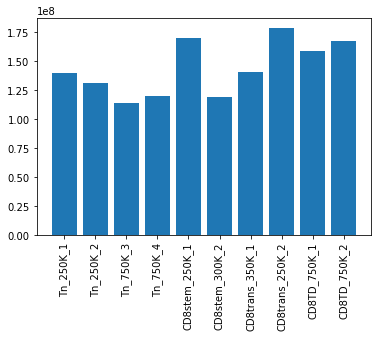

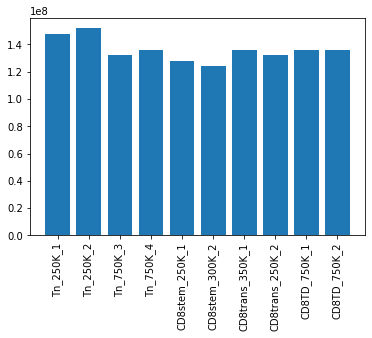

In [51]:
bar_plot_TIC(samples_df)
bar_plot_TIC(TICnorm_data_df)

#### I will not use TIC normalized data for the subsequent analyses
- This is targeted extract
- The TIC doesn't look bad at all

In [52]:
# # I decide to just replace the 
# def replace_col_wtTICnorm(feat_df = outDrop_grp_filt_df,
#                           data_df = TICnorm_data_df):
#     '''
#     replace the same column of feature dataframe (feat_df) with the data_df that have the same column
#     Return the feature dataframe. Note that the function is not limited to TIC normalized data.
#     '''
#     new_feat_df = copy.deepcopy(feat_df)
#     for col in data_df.columns:
#         new_feat_df[col] = data_df[col]

#     return(new_feat_df)

# TICnorm_feat_df = replace_col_wtTICnorm(feat_df = outDrop_grp_filt_df,
#                           data_df = TICnorm_data_df)

# TICnorm_feat_df.to_csv(
#         os.path.join(output_dir,
#                        f"TICnorm_groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False) # rename if needed

------

## Normalization by cell number??
- no need for normalization of cell numbers, since during experiments, reconsititution of samples already considered that part!

-----

## Summary
- run no normalization, directly using the samples_df for analyses

------

------

## Imputation with half minimum

In [81]:
# I decide to just replace the 
def replace_col_wtTICnorm(feat_df = outDrop_grp_filt_df,
                          data_df = TICnorm_data_df):
    '''
    replace the same column of feature dataframe (feat_df) with the data_df that have the same column
    Return the feature dataframe. Note that the function is not limited to TIC normalized data.
    '''
    new_feat_df = copy.deepcopy(feat_df)
    new_feat_df = new_feat_df.loc[data_df.index,:]
    for col in data_df.columns:
        new_feat_df[col] = data_df[col]

    return(new_feat_df)

In [82]:
def imputation(norm_data_df,full_asari_data_df,replace = 'half_minimum'):
    '''
    the row index should be matched btw. normalized data df & full asari df
    The reason to add full_asari_data_df is to add the true minimum across all samples. 
    It will better capture the baseline
    Default setting: if there is 0, then it will automatically deem as NA.
    full_asari_data_df can use the same dataset of norm_data_df
    norm_data_df can be exactly the same with not normalized dataset
    
    Output
    ======
    Return the NA filled norm_data_df
    ''' 
    
    # turn zero to NA
    norm_data_df[norm_data_df == 0] = np.nan
    full_asari_data_df[full_asari_data_df == 0] = np.nan
    
    if replace == 'half_minimum':
        for i,row in norm_data_df.iterrows():
            minimum_value = full_asari_data_df.loc[i,:].min()
            row.fillna(minimum_value/2,inplace = True) # imputation is minimum

    return(norm_data_df)

#### unnormalized table

In [83]:
# data_df contains all the samples columns including pooled blank and etc.
data_df.columns

Index(['Blank_1', 'Blank_2', 'Blank_std_1', 'Qstd_1', 'Qstd_2', 'pooled_1', 'Tn_250K_1', 'Tn_250K_2', 'Tn_750K_3', 'Tn_750K_4', 'CD8stem_250K_1', 'CD8stem_300K_2', 'pooled_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2', 'pooled_3', 'Qstd_3', 'Blank_3'], dtype='object')

In [84]:
# samples_df contains only relevant columns
samples_df.columns

Index(['Tn_250K_1', 'Tn_250K_2', 'Tn_750K_3', 'Tn_750K_4', 'CD8stem_250K_1', 'CD8stem_300K_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2'], dtype='object')

In [85]:
# Make sure they both point to Feature ID
print(data_df.index[0:5])
print(samples_df.index[0:5])

Index(['F1614', 'F3712', 'F1779', 'F3031', 'F3138'], dtype='object', name='id_number')
Index(['F1614', 'F3712', 'F1779', 'F3138', 'F5983'], dtype='object')


In [86]:
data_df_imphMin = imputation(norm_data_df = samples_df,
                                       full_asari_data_df = data_df,
                                       replace = 'half_minimum')

imphMin_feat_df = replace_col_wtTICnorm(feat_df = reord_target_feat_df,
                          data_df = data_df_imphMin)

imphMin_feat_df.to_csv(
        os.path.join(output_dir,
                       f"hMinImp_groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False)

In [88]:
imphMin_feat_df.shape

(42, 32)

# log2 transform

In [89]:
def log2transform(data_df,
                  back2Zero = False):
    data_df[data_df == 0] = np.nan
    data_df_log = data_df.apply(lambda x: np.log2(x)) # no need to add +1
    if back2Zero == True:
        data_df_log[data_df_log.isna()] = 0
    return(data_df_log)

In [90]:
def log2transform_on_featab_wtRegExpr(feat_df,
                                      back2Zero = False,
                                      samplesRegExpr = 'Tn\\_[0-9]+|CD8stem\\_[0-9]+|CD8trans\\_[0-9]+|CD8TD\\_[0-9]|pooled|Qstd|Blank'):
    data_df = select_column_regExpr(feat_df,samplesRegExpr)
    log2_data_df = log2transform(data_df, back2Zero = back2Zero)
    log2_feat_df = replace_col_wtTICnorm(feat_df = feat_df,
                                         data_df = log2_data_df)
    return(log2_feat_df)

#### log2 transform on the imputated feature tables

In [99]:
log2_imphMin_feat_df = log2transform_on_featab_wtRegExpr(imphMin_feat_df)

In [100]:
log2_imphMin_feat_df.head()

,query_target,id_number,mz,rtime,rtime_left_base,rtime_right_base,parent_masstrack_id,peak_area,cSelectivity,goodness_fitting,snr,detection_counts,Blank_1,Blank_2,Blank_std_1,Qstd_1,Qstd_2,pooled_1,Tn_250K_1,Tn_250K_2,Tn_750K_3,Tn_750K_4,CD8stem_250K_1,CD8stem_300K_2,pooled_2,CD8trans_350K_1,CD8trans_250K_2,CD8TD_750K_1,CD8TD_750K_2,pooled_3,Qstd_3,Blank_3
F1614,482.288282,F1614,482.2890,207.04,204.92,209.41,1335,4365548,0.88,0.85,430,16,NaN,14.327202,15.888505,NaN,NaN,18.293930,17.847883,19.322089,17.206747,16.011511,19.065524,18.775720,17.601800,18.752485,19.687716,17.351276,15.406006,18.592015,NaN,15.563047
F3712,498.283197,F3712,498.2843,33.72,32.23,36.32,1567,18072147,1.00,0.94,270,15,19.675886,19.452209,NaN,NaN,18.905405,20.547864,20.230927,19.796193,19.422648,19.244566,21.112034,19.845842,20.598280,20.028854,20.201600,17.905405,17.905405,20.443905,NaN,19.301740
F1779,524.298847,F1779,524.2982,96.47,93.85,99.13,1928,36918657,0.76,0.97,470,14,NaN,NaN,20.695606,NaN,NaN,21.418862,21.529151,21.496265,21.431077,21.425785,21.393290,21.040186,21.473887,21.362959,21.502930,21.625995,21.377809,21.517094,NaN,NaN
F3138,540.330147,F3138,540.3305,70.18,67.44,72.92,2147,29371349,0.95,0.98,23,7,NaN,NaN,NaN,22.712404,22.700019,NaN,20.138550,20.138550,21.165462,21.138550,20.138550,20.138550,NaN,20.138550,20.138550,21.147431,21.380375,NaN,22.71473,NaN
F5983,572.298847,F5983,572.2993,217.45,214.85,219.84,2580,25336616,1.00,0.94,1811,14,20.015209,NaN,NaN,NaN,NaN,21.192090,21.190690,20.710858,20.299399,20.468330,21.809494,20.606183,21.064945,20.406562,21.002888,18.598763,20.545764,21.373337,NaN,19.598763


In [101]:
log2_imphMin_feat_df.to_csv(
        os.path.join(output_dir,
                       f"log2_hMinImp_groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False)

-------

-----

-----

## Report geometric mean of group

In [102]:
from itertools import combinations
from pprint import pprint

names = ['john', 'jeff', 'george', 'peter', 'ringo']

combos = list(combinations(names, 2))
# pairs = [[x, y] for x in combos for y in combos if not set(x).intersection(set(y))]

pprint(combos)

[('john', 'jeff'),
 ('john', 'george'),
 ('john', 'peter'),
 ('john', 'ringo'),
 ('jeff', 'george'),
 ('jeff', 'peter'),
 ('jeff', 'ringo'),
 ('george', 'peter'),
 ('george', 'ringo'),
 ('peter', 'ringo')]


## the end index is `12`

In [106]:
log2_imphMin_feat_df.columns[11:]

Index(['detection_counts', 'Blank_1', 'Blank_2', 'Blank_std_1', 'Qstd_1', 'Qstd_2', 'pooled_1', 'Tn_250K_1', 'Tn_250K_2', 'Tn_750K_3', 'Tn_750K_4', 'CD8stem_250K_1', 'CD8stem_300K_2', 'pooled_2', 'CD8trans_350K_1', 'CD8trans_250K_2', 'CD8TD_750K_1', 'CD8TD_750K_2', 'pooled_3', 'Qstd_3', 'Blank_3'], dtype='object')

In [110]:
from itertools import combinations

def log2FCreport(log2_feat_df, 
          groupRegExprs = ['Tn\\_[0-9]+','CD8stem\\_[0-9]+','CD8trans\\_[0-9]+','CD8TD\\_[0-9]+'], # order always the reference on the left
          end_index = 12):
    '''
    The function require log2 feature table
    Using groupRegExprs to recognize the grouped samples. Only works for explicitly coded sample identification based on the name
    End_index is where the index end on the meta information coded in the log2_feature table
    Currently only deals with two group comparison
    '''
    #' separate data table and metainfo by `end_index` (needs to define beforehand)
    data_df = log2_feat_df.iloc[:,end_index:log2_feat_df.shape[1]]
    log2_feat_df_meta = log2_feat_df.iloc[:,0:end_index]
    
    # calculate gMean first
    group_of_mean_dict = {}
    for group in groupRegExprs:
        group_df = select_column_regExpr(log2_feat_df,group)
        group_df_mean = group_df.apply(lambda row: row.mean(),axis = 1)
        group_id = group.split('\\')[0]
        log2_feat_df_meta[f'gMean_{group_id}'] = group_df_mean
        group_of_mean_dict.update({group_id : group_df_mean})
    
    # calculate log2 fold change  using `group_of_mean_dict`
    combos = list(combinations(group_of_mean_dict.keys(), 2))
    for combo in combos:
        log2_feat_df_meta[f'log2FC_{combo[1]}vs{combo[0]}'] = [y - x for (x,y) in zip(group_of_mean_dict[combo[0]],
                                                                                           group_of_mean_dict[combo[1]])]
    final_df = pd.concat([log2_feat_df_meta,data_df],axis = 1)
    return(final_df)

### **Imputated** TICnorm log2 data : report gMean

In [112]:
FC_log2_TICnorm_imphMin_feat_df = log2FCreport(log2_feat_df = log2_TICnorm_imphMin_feat_df,
                                      end_index = 12)

FC_log2_TICnorm_imphMin_feat_df.to_csv(
        os.path.join(output_dir,
                       f"FC_log2_hMinImp_groupFil{group_percNA_threshold}_{mode}_featab.csv"),index = False)

-------

-------